Shyju Kozhisseri<br/>ID: 309572<br/>Group: J41323c

## Import Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
input = pd.read_csv('garments_worker_productivity.csv')

In [3]:
input.head()

date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0             0.886500  
2                   0           30.5             0.800570  
3                   0           30.5             0.800570  
4                   0           56.0             0.800382

In [4]:
input.describe()

team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1440.000000     0.000000     0.000000     0.000000   
50%     3960.000000     0.000000     0.000000     0.000000   
75%     6960.000000    50.000000     0.000000     0.000000   
max    25920.000000  3600.000000   300.000000    45.000000   

       no_of_style_change  no_of_workers  actual_productivity  
count         1197.000000    1197.000000          1197.000000  
mean             0.150376      34.609858             0.735091  
std              0.427848      22.197687             0.174488  
min              0.000000       2.000000             0.233705  
25%              0.000000       9.000000             0.650307  
50%              0.000000      34.000000             0.773333  
75%              0.000000      57.000000             0.850253  
max              2.000000      89.000000             1.120437

In [5]:
input.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [6]:
sub_sample = input[['smv', 'no_of_workers', 'wip', 'targeted_productivity', 'actual_productivity']]
sub_sample

smv  no_of_workers     wip  targeted_productivity  actual_productivity
0     26.16           59.0  1108.0                   0.80             0.940725
1      3.94            8.0     NaN                   0.75             0.886500
2     11.41           30.5   968.0                   0.80             0.800570
3     11.41           30.5   968.0                   0.80             0.800570
4     25.90           56.0  1170.0                   0.80             0.800382
...     ...            ...     ...                    ...                  ...
1192   2.90            8.0     NaN                   0.75             0.628333
1193   3.90            8.0     NaN                   0.70             0.625625
1194   3.90            8.0     NaN                   0.65             0.625625
1195   2.90           15.0     NaN                   0.75             0.505889
1196   2.90            6.0     NaN                   0.70             0.394722

[1197 rows x 5 columns]

In [7]:
sub_sample = sub_sample.fillna(sub_sample.mean())
sub_sample.head()

smv  no_of_workers          wip  targeted_productivity  \
0  26.16           59.0  1108.000000                   0.80   
1   3.94            8.0  1190.465991                   0.75   
2  11.41           30.5   968.000000                   0.80   
3  11.41           30.5   968.000000                   0.80   
4  25.90           56.0  1170.000000                   0.80   

   actual_productivity  
0             0.940725  
1             0.886500  
2             0.800570  
3             0.800570  
4             0.800382

## Scale Data

In [8]:
scaler = MinMaxScaler()
original_data = sub_sample.copy()
sub_sample[['smv', 'no_of_workers', 'wip']] = scaler.fit_transform(sub_sample.iloc[:,:-2])
sub_sample

smv  no_of_workers       wip  targeted_productivity  \
0     0.450252       0.655172  0.047631                   0.80   
1     0.020132       0.068966  0.051199                   0.75   
2     0.164731       0.327586  0.041575                   0.80   
3     0.164731       0.327586  0.041575                   0.80   
4     0.445219       0.620690  0.050314                   0.80   
...        ...            ...       ...                    ...   
1192  0.000000       0.068966  0.051199                   0.75   
1193  0.019357       0.068966  0.051199                   0.70   
1194  0.019357       0.068966  0.051199                   0.65   
1195  0.000000       0.149425  0.051199                   0.75   
1196  0.000000       0.045977  0.051199                   0.70   

      actual_productivity  
0                0.940725  
1                0.886500  
2                0.800570  
3                0.800570  
4                0.800382  
...                   ...  
1192             0.628333  
1193             0.625625  
1194             0.625625  
1195             0.505889  
1196             0.394722  

[1197 rows x 5 columns]

In [9]:
sub_sample.describe()

smv  no_of_workers          wip  targeted_productivity  \
count  1197.000000    1197.000000  1197.000000            1197.000000   
mean      0.235427       0.374826     0.051199               0.729632   
std       0.211832       0.255146     0.060378               0.097891   
min       0.000000       0.000000     0.000000               0.070000   
25%       0.020132       0.080460     0.041661               0.700000   
50%       0.239257       0.367816     0.051199               0.750000   
75%       0.413473       0.632184     0.051199               0.800000   
max       1.000000       1.000000     1.000000               0.800000   

       actual_productivity  
count          1197.000000  
mean              0.735091  
std               0.174488  
min               0.233705  
25%               0.650307  
50%               0.773333  
75%               0.850253  
max               1.120437

## Confidence Intervals

In [10]:
def confidence_intervals(index, column, mean, var, std, median):
    # Calculation of the 95% confidence interval for the sample mean
    norm_q95 = stats.norm.ppf(0.95)
    mean_conf = norm_q95 * std / np.sqrt(len(column))

    # Calculation of 95% confidence intervals for variance and standard deviation
    chi2_q95_left = stats.chi2.ppf((1 - 0.05 / 2.0), df=len(column) - 1)
    chi2_q95_right = stats.chi2.ppf(0.05 / 2.0, df=len(column) - 1)

    var_conf_left = var * (len(column) - 1) / chi2_q95_left
    var_conf_right = var * (len(column) - 1) / chi2_q95_right
    std_conf_left = np.sqrt(var_conf_left)
    std_conf_right = np.sqrt(var_conf_right)


    print(index,"- sample mean: %0.3f +/- %0.3f" % (mean, mean_conf))
    print("95%% Confidence interval of sample variance : (%0.3f; %0.3f)"
        % (var_conf_left, var_conf_right))
    print("95%% Confidence interval of sample standard deviation: (%0.3f; %0.3f)"
        % (std_conf_left, std_conf_right))
    print("\n")

In [11]:
for index in original_data.columns:
    column = original_data[index]
    mean = original_data[index].mean()
    var = original_data[index].var()
    std = original_data[index].std()
    median = original_data[index].median()

    confidence_intervals(index, column, mean, var, std, median)



smv - sample mean: 15.062 +/- 0.520
95% Confidence interval of sample variance : (110.707; 129.963)
95% Confidence interval of sample standard deviation: (10.522; 11.400)


no_of_workers - sample mean: 34.610 +/- 1.055
95% Confidence interval of sample variance : (455.512; 534.743)
95% Confidence interval of sample standard deviation: (21.343; 23.125)


wip - sample mean: 1190.466 +/- 66.352
95% Confidence interval of sample variance : (1800678.382; 2113884.184)
95% Confidence interval of sample standard deviation: (1341.894; 1453.920)


targeted_productivity - sample mean: 0.730 +/- 0.005
95% Confidence interval of sample variance : (0.009; 0.010)
95% Confidence interval of sample standard deviation: (0.094; 0.102)


actual_productivity - sample mean: 0.735 +/- 0.008
95% Confidence interval of sample variance : (0.028; 0.033)
95% Confidence interval of sample standard deviation: (0.168; 0.182)




## Conditional Distribution

In [12]:
cond_sample = sub_sample.copy()
cond_sample['team'] = input['team']
cond_sample.head()

smv  no_of_workers       wip  targeted_productivity  \
0  0.450252       0.655172  0.047631                   0.80   
1  0.020132       0.068966  0.051199                   0.75   
2  0.164731       0.327586  0.041575                   0.80   
3  0.164731       0.327586  0.041575                   0.80   
4  0.445219       0.620690  0.050314                   0.80   

   actual_productivity  team  
0             0.940725     8  
1             0.886500     1  
2             0.800570    11  
3             0.800570    12  
4             0.800382     6

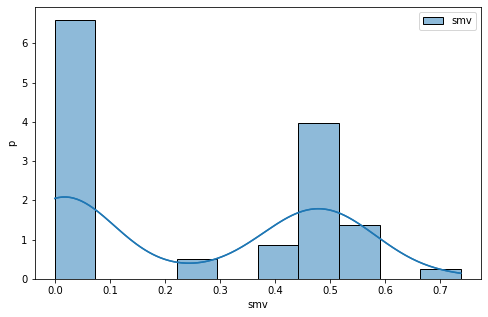

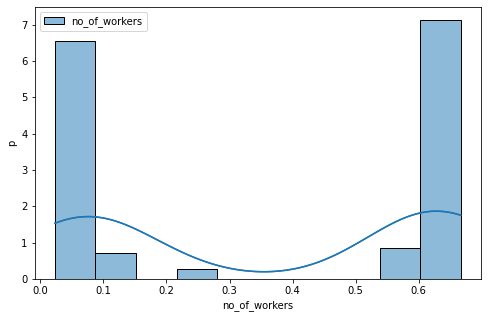

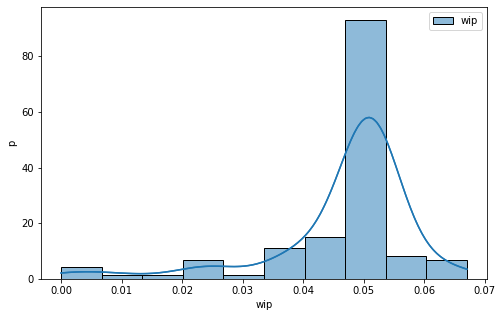

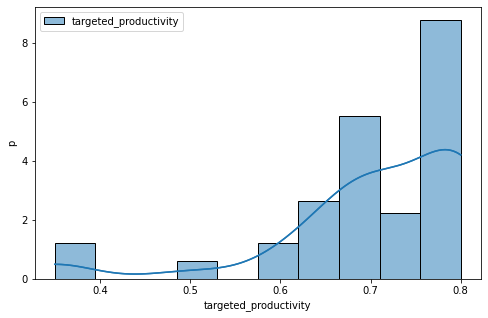

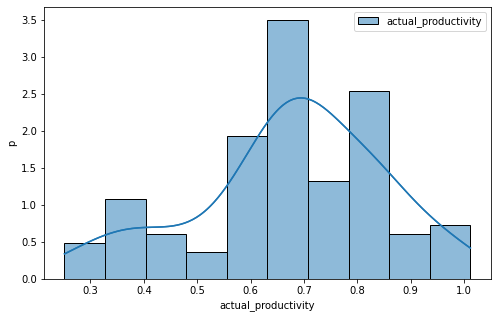

In [13]:
#Conditional Distribution - for team 8

cond_sample_8 = cond_sample[cond_sample['team']==8][['smv','no_of_workers','wip','targeted_productivity','actual_productivity']]

for index, column in enumerate(cond_sample_8.columns):

    plt.figure(figsize=(8, 5))

    kernel = stats.gaussian_kde(cond_sample_8[column])

    min_amount, max_amount = cond_sample_8[column].min(), cond_sample_8[column].max()
    x = np.linspace(min_amount, max_amount, len(cond_sample_8[column]))
    kde_values = kernel(x)

    sns.histplot(cond_sample_8[column], kde=True, stat='density', label=column, bins=10)
    plt.plot(x, kde_values)
    plt.ylabel('p')
    plt.xlabel(column)
    plt.legend()
    plt.show()


In [14]:
#Conditional Mean and Variance
cond_sample_8.mean()

smv                      0.249127
no_of_workers            0.361964
wip                      0.046618
targeted_productivity    0.708257
actual_productivity      0.674148
dtype: float64

In [15]:
cond_sample_8.cov()

smv  no_of_workers       wip  \
smv                    0.055677       0.062865 -0.001338   
no_of_workers          0.062865       0.076204 -0.001280   
wip                   -0.001338      -0.001280  0.000145   
targeted_productivity -0.000257      -0.001404 -0.000048   
actual_productivity   -0.003364      -0.003205  0.000302   

                       targeted_productivity  actual_productivity  
smv                                -0.000257            -0.003364  
no_of_workers                      -0.001404            -0.003205  
wip                                -0.000048             0.000302  
targeted_productivity               0.012940             0.005363  
actual_productivity                 0.005363             0.031122

## Histogram Plot and Kernel Density Estimate

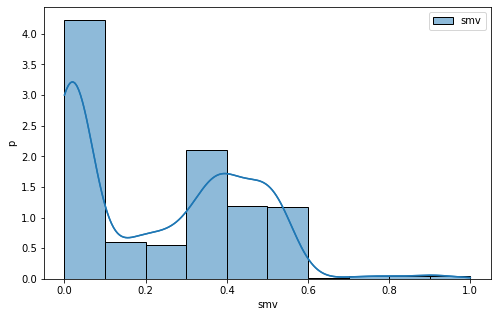

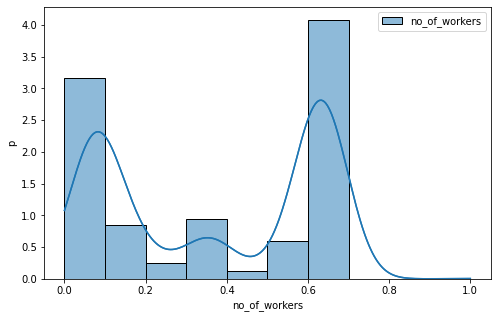

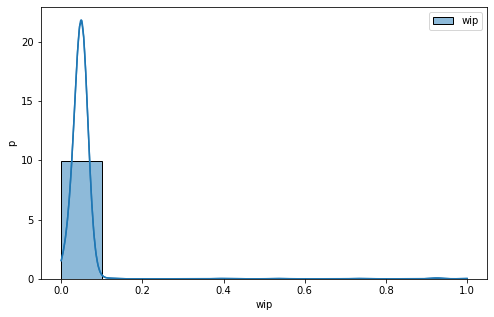

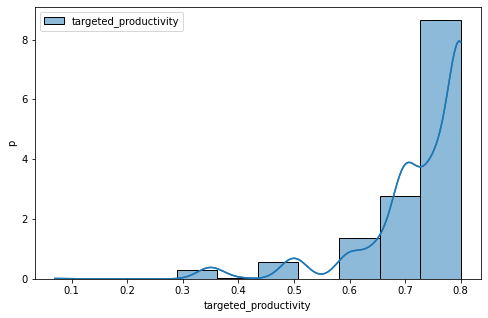

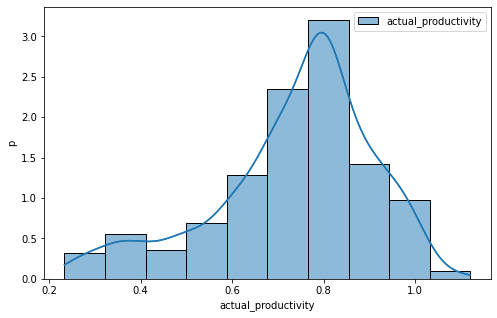

In [16]:
for index, column in enumerate(sub_sample.columns):
    plt.figure(figsize=(8, 5))

    kernel = stats.gaussian_kde(sub_sample[column])

    min_amount, max_amount = sub_sample[column].min(), sub_sample[column].max()
    x = np.linspace(min_amount, max_amount, len(sub_sample))
    kde_values = kernel(x)

    sns.histplot(sub_sample[column], kde=True, stat='density', label=column, bins=10)
    plt.plot(x, kde_values)
    plt.ylabel('p')
    plt.xlabel(column)
    plt.legend()
    plt.show()

## Expectation Value and Covariance

In [17]:
sample_mean = sub_sample.mean(axis=0)
sample_mean

smv                      0.235427
no_of_workers            0.374826
wip                      0.051199
targeted_productivity    0.729632
actual_productivity      0.735091
dtype: float64

In [18]:
sample_var = sub_sample.var(axis=0)
sample_var

smv                      0.044873
no_of_workers            0.065099
wip                      0.003646
targeted_productivity    0.009583
actual_productivity      0.030446
dtype: float64

In [19]:
sample_cov = sub_sample.cov()
sample_cov

smv  no_of_workers       wip  \
smv                    0.044873       0.049301 -0.000234   
no_of_workers          0.049301       0.065099  0.000151   
wip                   -0.000234       0.000151  0.003646   
targeted_productivity -0.001441      -0.002105  0.000290   
actual_productivity   -0.004513      -0.002582  0.000931   

                       targeted_productivity  actual_productivity  
smv                                -0.001441            -0.004513  
no_of_workers                      -0.002105            -0.002582  
wip                                 0.000290             0.000931  
targeted_productivity               0.009583             0.007201  
actual_productivity                 0.007201             0.030446

/home/shyju/anaconda3/envs/DataAnalysis/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<Figure size 1440x576 with 0 Axes>

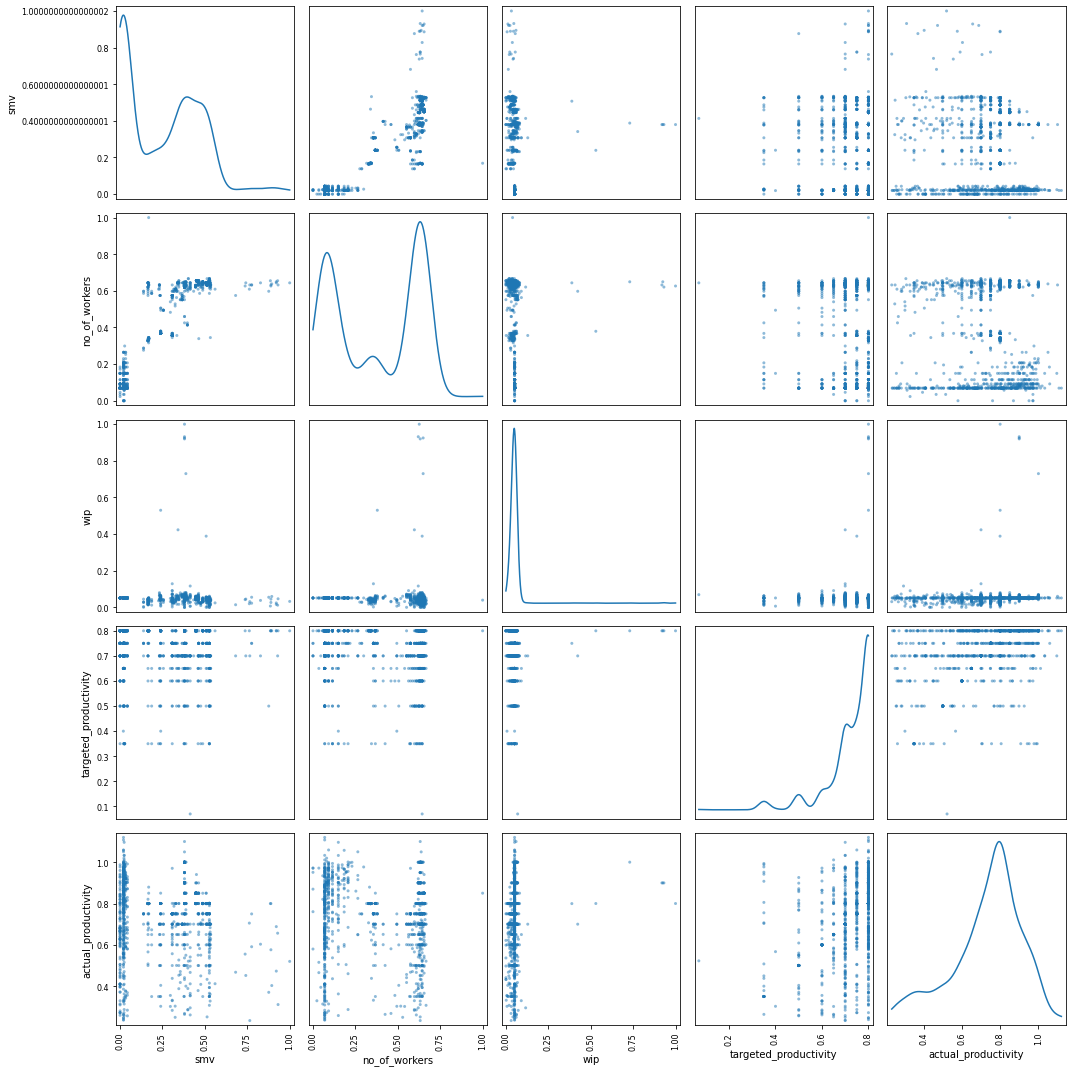

In [20]:
plt.figure(figsize=(20, 8))
pd.plotting.scatter_matrix(sub_sample, figsize  = [15, 15],diagonal="kde")
plt.tight_layout()
plt.show()

## Correlation Coefficient

In [21]:
sub_sample.corr()

smv  no_of_workers       wip  \
smv                    1.000000       0.912176 -0.018322   
no_of_workers          0.912176       1.000000  0.009791   
wip                   -0.018322       0.009791  1.000000   
targeted_productivity -0.069489      -0.084288  0.049114   
actual_productivity   -0.122089      -0.057991  0.088365   

                       targeted_productivity  actual_productivity  
smv                                -0.069489            -0.122089  
no_of_workers                      -0.084288            -0.057991  
wip                                 0.049114             0.088365  
targeted_productivity               1.000000             0.421594  
actual_productivity                 0.421594             1.000000

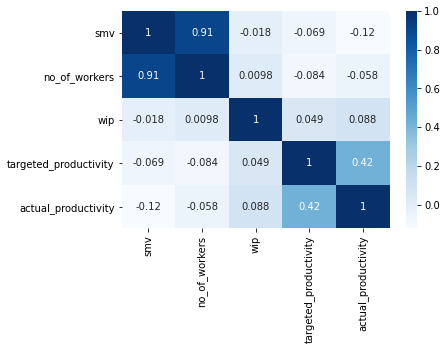

In [22]:
corrMatrix = sub_sample.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

## Confidence Intervals

In [23]:
import math
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))


for index, column in enumerate(sub_sample.iloc[:, :-1].columns):

    x = sub_sample[column]
    y = sub_sample['actual_productivity']
    alpha = 0.05
    
    r, p = stats.pearsonr(x,y)
    se = 1/np.sqrt(x.size-3)
    z = r_to_z(r)
    z_crit = stats.norm.ppf(1-alpha/2)
    lo_z = z - z_crit * se
    hi_z = z + z_crit * se

    lo_r = z_to_r(lo_z)
    hi_r = z_to_r(hi_z) 

    print(column," vs actual_productivity")
    print('Correlation Coefficient = ', r)
    print('P-value:', p)
    print('Confidence interval:', lo_r, hi_r)
    print("\n")

smv  vs actual_productivity
Correlation Coefficient =  -0.12208884072558171
P-value: 2.2811300110670583e-05
Confidence interval: -0.17752133212596707 -0.06588408564401288


no_of_workers  vs actual_productivity
Correlation Coefficient =  -0.05799059224354603
P-value: 0.044863456754889744
Confidence interval: -0.11427562397385241 -0.001334461051786532


wip  vs actual_productivity
Correlation Coefficient =  0.088364608769248
P-value: 0.0022133368509898916
Confidence interval: 0.03186362714508965 0.1443026325438725


targeted_productivity  vs actual_productivity
Correlation Coefficient =  0.4215938837001504
P-value: 8.99789915317529e-53
Confidence interval: 0.3738641320760366 0.4670965253690198




## Multivariate Distributions

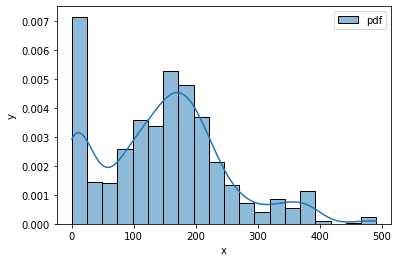

In [24]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=sample_mean, cov=sample_cov)
mnd = var.pdf(sub_sample)


min_amount, max_amount = mnd.min(), mnd.max()
x = np.linspace(min_amount, max_amount, len(mnd))

sns.histplot(mnd, kde=True, stat='density', label=f'pdf', bins=20)
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

In [25]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [26]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s)
    pdf = np.zeros((nb_of_x, nb_of_x))
    
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf 

Text(0.5, 1.0, 'Target vs Actual')

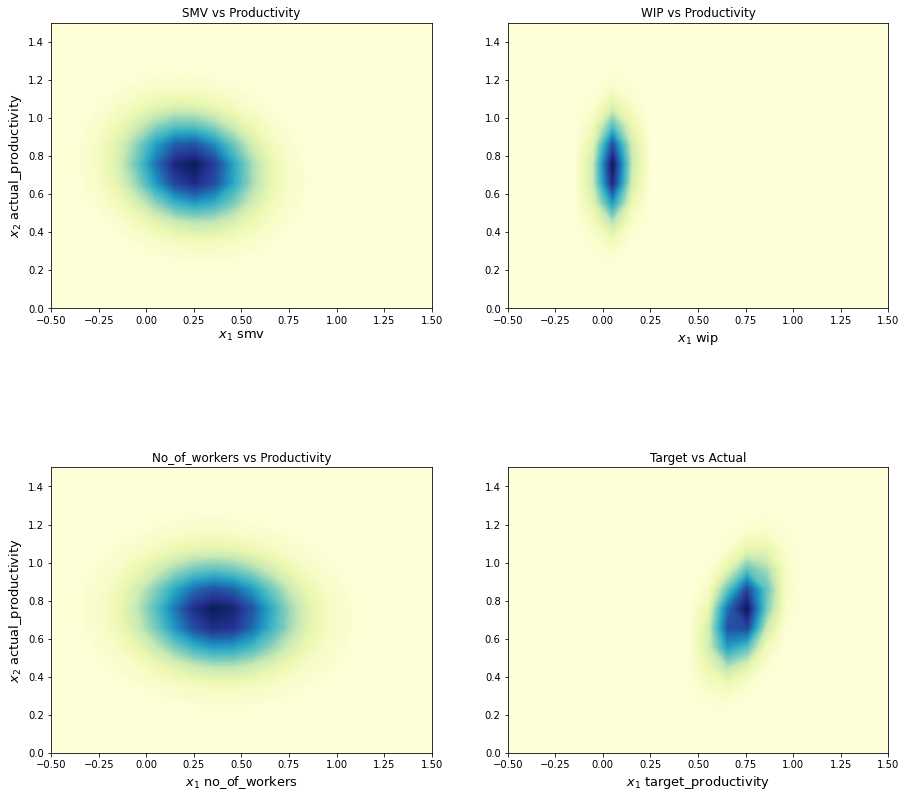

In [27]:
from matplotlib import cm

bivariate_mean_smv = sub_sample[['smv', 'actual_productivity']].mean().values.reshape(2,1)
bivariate_mean_wip = sub_sample[['wip', 'actual_productivity']].mean().values.reshape(2,1)
bivariate_mean_now = sub_sample[['no_of_workers', 'actual_productivity']].mean().values.reshape(2,1)
bivariate_mean_tp = sub_sample[['targeted_productivity', 'actual_productivity']].mean().values.reshape(2,1)
bivariate_covariance_smv = sub_sample[['smv', 'actual_productivity']].cov().values
bivariate_covariance_wip = sub_sample[['wip', 'actual_productivity']].cov().values
bivariate_covariance_now = sub_sample[['no_of_workers', 'actual_productivity']].cov().values
bivariate_covariance_tp = sub_sample[['targeted_productivity', 'actual_productivity']].cov().values


fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
d = 2 

x1, x2, p = generate_surface(
    bivariate_mean_smv, bivariate_covariance_smv, d)
con = ax1.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$ smv', fontsize=13)
ax1.set_ylabel('$x_2$ actual_productivity', fontsize=13)
ax1.axis([-0.5, 1.5, 0, 1.5])
ax1.set_aspect('equal')
ax1.set_title('SMV vs Productivity', fontsize=12)


x3, x4, p = generate_surface(
    bivariate_mean_wip, bivariate_covariance_wip, d)
con = ax2.contourf(x3, x4, p, 100, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$ wip', fontsize=13)
ax2.axis([-0.5, 1.5, 0, 1.5])
ax2.set_aspect('equal')
ax2.set_title('WIP vs Productivity', fontsize=12)


x5, x6, p = generate_surface(
    bivariate_mean_now, bivariate_covariance_now, d)

con = ax3.contourf(x5, x6, p, 100, cmap=cm.YlGnBu)
ax3.set_xlabel('$x_1$ no_of_workers', fontsize=13)
ax3.set_ylabel('$x_2$ actual_productivity', fontsize=13)
ax3.axis([-0.5, 1.5, 0, 1.5])
ax3.set_aspect('equal')
ax3.set_title('No_of_workers vs Productivity', fontsize=12)

x7, x8, p = generate_surface(
    bivariate_mean_tp, bivariate_covariance_tp, d)
con = ax4.contourf(x7, x8, p, 100, cmap=cm.YlGnBu)
ax4.set_xlabel('$x_1$ target_productivity', fontsize=13)
ax4.axis([-0.5, 1.5, 0, 1.5])
ax4.set_aspect('equal')
ax4.set_title('Target vs Actual', fontsize=12)


## Multicollinearity 

In [28]:
vif_data = pd.DataFrame()
vif_data["feature"] = sub_sample.columns

vif_data["VIF"] = [variance_inflation_factor(sub_sample.values, i)
                          for i in range(len(sub_sample.columns))]

vif_data
# high multicollinearity suggests targeted_productivity and actual_productivity are highly correlated

feature        VIF
0                    smv  13.841624
1          no_of_workers  18.976495
2                    wip   1.735869
3  targeted_productivity  24.386545
4    actual_productivity  23.372252

## PCA

In [29]:
pca = PCA(n_components=0.95)

X = sub_sample.iloc[:, :-1]
y = sub_sample.iloc[:, -1]

X = pca.fit_transform(X)
X 

array([[ 0.35103852, -0.07895021,  0.01168971],
       [-0.37350672, -0.01152372, -0.02533228],
       [-0.083125  , -0.0665739 ,  0.02351852],
       ...,
       [-0.37134312,  0.08828325, -0.0275268 ],
       [-0.32389678, -0.01010736,  0.03893409],
       [-0.40270817,  0.03921408, -0.0257095 ]])

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.85536664, 0.93278246, 0.97113595])

## Regression Model

In [31]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                 
Dep. Variable:     actual_productivity   R-squared (uncentered):                   0.011
Model:                             OLS   Adj. R-squared (uncentered):              0.009
Method:                  Least Squares   F-statistic:                              4.560
Date:                 Tue, 20 Apr 2021   Prob (F-statistic):                     0.00349
Time:                         12:33:45   Log-Likelihood:                         -1356.0
No. Observations:                 1197   AIC:                                      2718.
Df Residuals:                     1194   BIC:                                      2733.
Df Model:                            3                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [32]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)

Parameters:  x1   -0.047850
x2   -0.736360
x3    0.473238
dtype: float64
Standard errors:  x1    0.066997
x2    0.222699
x3    0.316396
dtype: float64


## Model Evaluation

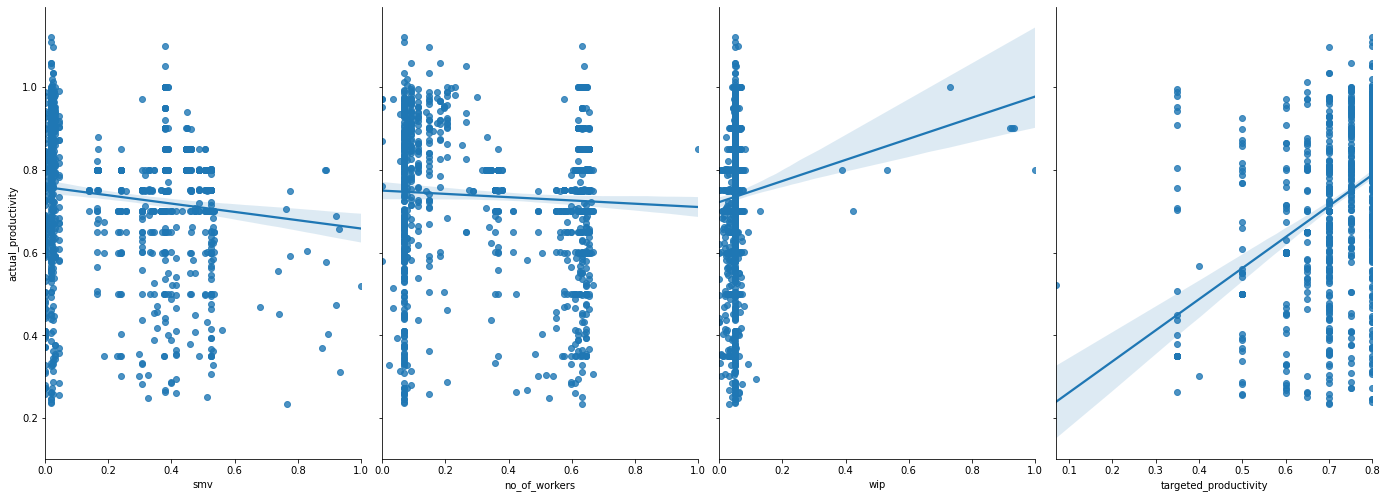

In [33]:
sns.pairplot(sub_sample, x_vars=['smv','no_of_workers','wip', 'targeted_productivity'], y_vars='actual_productivity', height=7, aspect=0.7, kind='reg')

### Model Confidence Intervals

<Figure size 432x288 with 0 Axes>

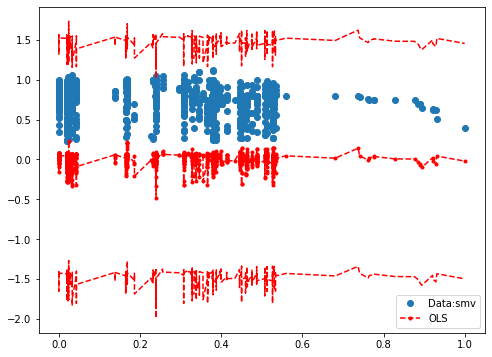

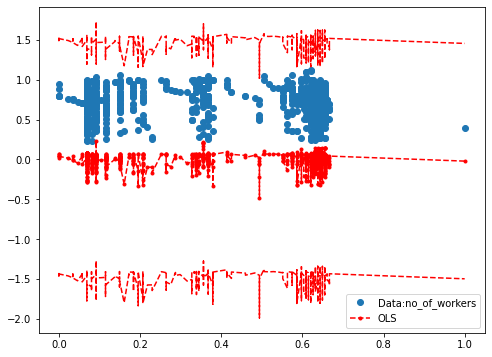

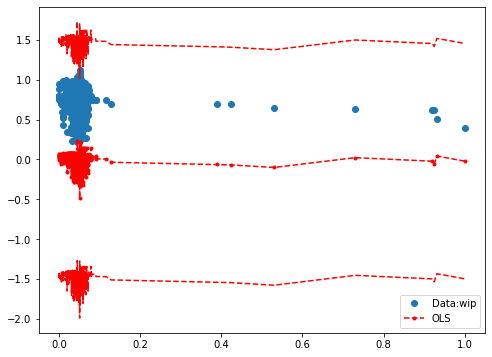

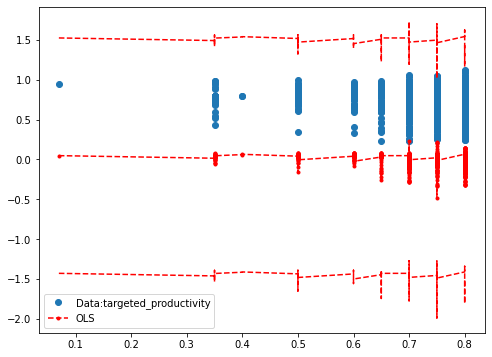

In [34]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig = plt.figure()

for index,column in enumerate(sub_sample.iloc[:,:-1].columns):
    fig, ax = plt.subplots(figsize=(8,6))
    data = 'Data:' + str(column)
    ax.plot(np.sort(sub_sample[column]), y, 'o', label=data)
    ax.plot(np.sort(sub_sample[column]), results.fittedvalues, 'r--.', label="OLS")
    ax.plot(np.sort(sub_sample[column]), iv_u, 'r--')
    ax.plot(np.sort(sub_sample[column]), iv_l, 'r--')
    ax.legend(loc='best')

### Normality

In [35]:
pred_val = results.fittedvalues.copy()
true_val = y.values.copy()
residual = true_val - pred_val

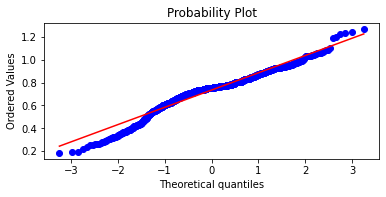

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

### Coefficient of Determination

In [ ]:
results.rsquared

0.011327780052435177